In [40]:
import os
import json

# Create an empty list to store the dictionaries
json_data_list = []

# Directory where your JSON files are located
json_files_directory = '/content/files'

# Loop through each JSON file in the directory
for filename in os.listdir(json_files_directory):
    if filename.endswith('.json'):
        # Construct the full path to the JSON file
        file_path = os.path.join(json_files_directory, filename)

        # Open and read the JSON file
        with open(file_path, 'r') as json_file:
            # Load the JSON data into a dictionary
            json_data = json.load(json_file)

            # Create a new dictionary to hold both the file name and JSON data
            json_with_filename = {
                'filename': filename,  # Save the file name
                'data': json_data     # Save the JSON data
            }

            # Append the dictionary to the list
            json_data_list.append(json_with_filename)

# Now, json_data_list contains a list of dictionaries, where each dictionary has a 'filename' key
# with the name of the JSON file and a 'data' key with the JSON data from that file.


In [41]:
json_data_list[0]

{'filename': 'data_20231008231704.json',
 'data': {'targetAmount': 500000.0,
  'raisedAmount': 4953297.0,
  'supporters': 4769,
  'targetDate': '2023-11-10'}}

In [42]:
import pandas as pd


# Create a DataFrame
df = pd.DataFrame(json_data_list)

# If you want to flatten the 'data' dictionary into separate columns:
df = pd.concat([df.drop(['data'], axis=1), df['data'].apply(pd.Series)], axis=1)

# Now, df contains your data in a Pandas DataFrame format
df


,filename,targetAmount,raisedAmount,supporters,targetDate
0,data_20231008231704.json,500000.0,4953297.0,4769,2023-11-10
1,data_20231008190904.json,500000.0,4572631.0,4303,2023-11-10
2,data_20231007185004.json,500000.0,3727436.0,3383,2023-11-10
3,data_20231007152904.json,500000.0,3567970.0,3212,2023-11-10
4,data_20231008205004.json,500000.0,4720368.0,4478,2023-11-10
...,...,...,...,...,...
628,data_20231008202303.json,500000.0,4687333.0,4434,2023-11-10
629,data_20231007172904.json,500000.0,3669552.0,3315,2023-11-10
630,data_20231007230004.json,500000.0,3851680.0,3522,2023-11-10
631,data_20231007231004.json,500000.0,3856495.0,3527,2023-11-10


In [43]:
# Extract and transform the 'filename' column into a timestamp column
df['timestamp'] = pd.to_datetime(df['filename'].str.extract(r'data_(\d{14})\.json')[0], format='%Y%m%d%H%M%S')

# Drop the 'filename' column if no longer needed
df = df.drop('filename', axis=1)

# Now, df contains a 'timestamp' column extracted from the 'filename'
df.head()


,targetAmount,raisedAmount,supporters,targetDate,timestamp
0,500000.0,4953297.0,4769,2023-11-10,2023-10-08 23:17:04
1,500000.0,4572631.0,4303,2023-11-10,2023-10-08 19:09:04
2,500000.0,3727436.0,3383,2023-11-10,2023-10-07 18:50:04
3,500000.0,3567970.0,3212,2023-11-10,2023-10-07 15:29:04
4,500000.0,4720368.0,4478,2023-11-10,2023-10-08 20:50:04


In [44]:
df.drop(columns=["targetAmount", "targetDate"], inplace=True)

In [45]:
df.head(10)

,raisedAmount,supporters,timestamp
0,4953297.0,4769,2023-10-08 23:17:04
1,4572631.0,4303,2023-10-08 19:09:04
2,3727436.0,3383,2023-10-07 18:50:04
3,3567970.0,3212,2023-10-07 15:29:04
4,4720368.0,4478,2023-10-08 20:50:04
5,4737418.0,4502,2023-10-08 21:13:03
6,3664688.0,3307,2023-10-07 17:21:03
7,3624185.0,3264,2023-10-07 16:34:04
8,3753134.0,3409,2023-10-07 19:25:04
9,4978579.0,4806,2023-10-08 23:32:04


In [48]:
df.sort_values(by='raisedAmount', ascending=False, inplace=True)

In [50]:
df.head(10)

,raisedAmount,supporters,timestamp
369,5053594.0,4901,2023-10-09 05:55:04
161,5053276.0,4900,2023-10-09 05:53:03
207,5053207.0,4900,2023-10-09 05:48:03
204,5052357.0,4899,2023-10-09 03:44:04
27,5051907.0,4898,2023-10-09 02:45:04
405,5051648.0,4897,2023-10-09 02:24:03
591,5051198.0,4896,2023-10-09 01:20:03
91,5051129.0,4896,2023-10-09 01:18:03
239,5050679.0,4895,2023-10-09 01:07:03
147,5050171.0,4894,2023-10-09 01:05:04


In [51]:
import pandas as pd

# Assuming you already have a DataFrame df

# Create a new DataFrame to store the filtered rows
filtered_df = pd.DataFrame(columns=df.columns)

# Initialize a variable to keep track of the previous raisedAmount
previous_raisedAmount = float('-inf')

# Iterate through the rows of the original DataFrame
for index, row in df.iterrows():
    current_raisedAmount = row['raisedAmount']

    # Check if the current raisedAmount is smaller or equal to the previous one
    if current_raisedAmount <= previous_raisedAmount:
        # Add the row to the filtered DataFrame
        filtered_df = filtered_df.append(row, ignore_index=True)

    # Update the previous_raisedAmount for the next iteration
    previous_raisedAmount = current_raisedAmount

# filtered_df now contains the rows where raisedAmount is not greater than the previous one
filtered_df

<ipython-input-51-5a6d2d9ef3c6>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_df = filtered_df.append(row, ignore_index=True)


,raisedAmount,supporters,timestamp
0,5053276.0,4900,2023-10-09 05:53:03
1,5053207.0,4900,2023-10-09 05:48:03
2,5052357.0,4899,2023-10-09 03:44:04
3,5051907.0,4898,2023-10-09 02:45:04
4,5051648.0,4897,2023-10-09 02:24:03
...,...,...,...
627,3511255.0,3152,2023-10-07 14:09:20
628,3511255.0,3152,2023-10-07 14:10:15
629,3511114.0,3152,2023-10-07 14:13:03
630,3510664.0,3151,2023-10-07 14:12:04


In [52]:
filtered_df.shape

(632, 3)

In [53]:
df.shape

(633, 3)

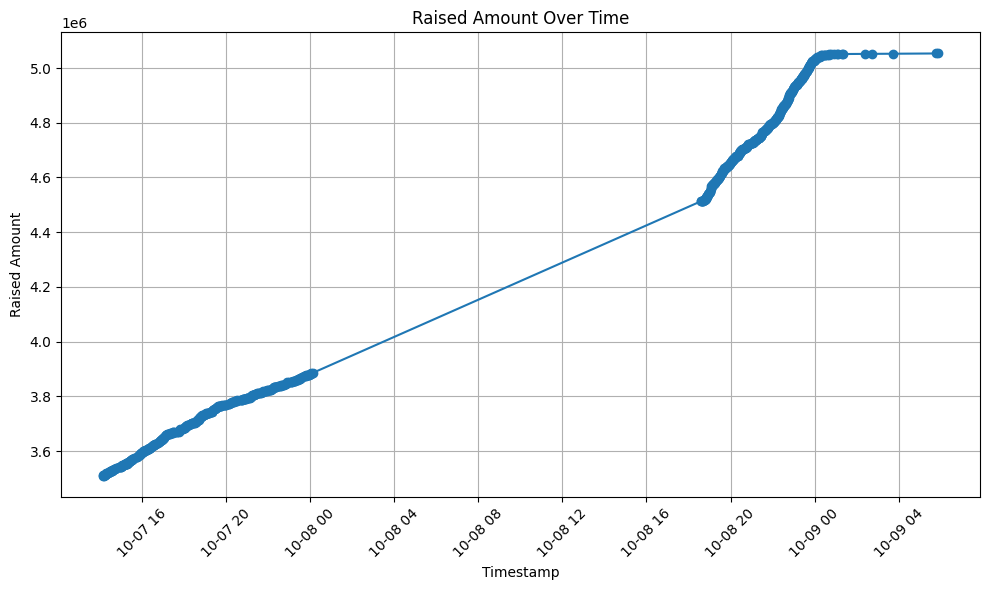

In [56]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called filtered_df with the data

# Extract the data from the DataFrame
raisedAmount = filtered_df['raisedAmount']
timestamp = filtered_df['timestamp']

# Convert the 'timestamp' column to datetime objects
timestamp = pd.to_datetime(timestamp)

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(timestamp, raisedAmount, marker='o', linestyle='-')
plt.title('Raised Amount Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Raised Amount')
plt.grid(True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
